In [1]:
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data1=pd.read_csv('./ex1data1.txt',header=None,names=['x','y'])
data1.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data1.describe()

,x,y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


原始数据点图

<AxesSubplot:xlabel='x', ylabel='y'>

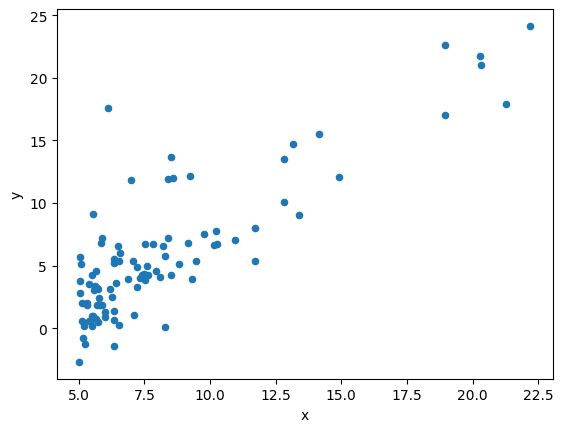

In [4]:
data1.plot(x='x',y='y',kind='scatter')

均值归一化计算函数

In [5]:
def mean_normalization(data,avg,max):
    return [ (item-avg)/max for item in data]
mean_normalization([1,2,3],2,3)

[-0.3333333333333333, 0.0, 0.3333333333333333]

特征缩放计算函数

In [6]:
def feature_scaling(data,max):
    return [ item/max for item in data]

计算最大值，均值用于均值归一化计算

In [7]:
data1_x_max=data1['x'].max()
data1_y_max=data1['y'].max()
data1_x_avg=data1['x'].mean()
data1_y_avg=data1['y'].mean()
print(data1_x_max,data1_y_max,data1_x_avg,data1_y_avg)

22.203 24.147 8.159799999999999 5.839135051546393


均值归一化后结果集合

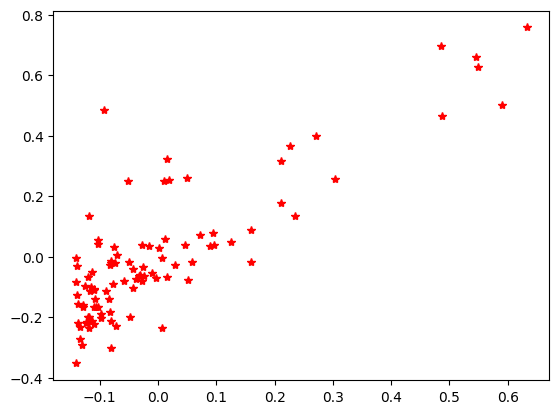

In [8]:
data1_x_mn=mean_normalization(data1['x'],data1_x_avg,data1_x_max)
data1_y_mn=mean_normalization(data1['y'],data1_y_avg,data1_y_max)
plt.plot(data1_x_mn,data1_y_mn,'r*')

特征缩放后结果集合

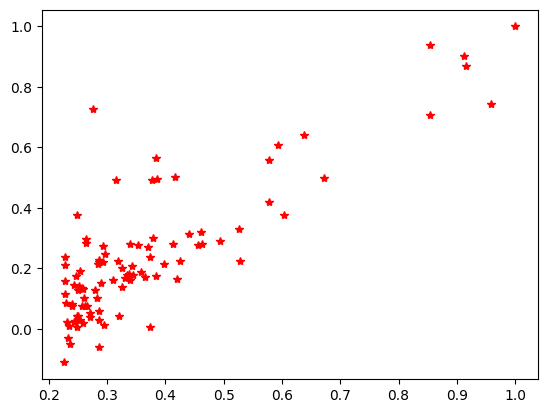

In [9]:
data1_x_fs=feature_scaling(data1['x'],data1_x_max)
data1_y_fs=feature_scaling(data1['y'],data1_y_max)
plt.plot(data1_x_fs,data1_y_fs,'r*')

代价函数

In [10]:
def compute_cost(x,y,theta):
    tmp=nm.power((x*theta.T-y),2)
    return nm.sum(tmp)/(2*len(x))
# f=2x+3
compute_cost(nm.matrix([[1,1],[1,2],[1,3]]),nm.matrix([[5],[7],[9]]),nm.matrix([3,2.1]))

0.023333333333333404

梯度下降

In [11]:
def gradient_descent(x,y,theta,alpha,itr):
    temp = nm.matrix(nm.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = nm.zeros(itr)
    for i in range(itr):
        tmp1=x*theta.T-y
        for j in range(parameters):
            tmp2=nm.multiply(tmp1,x[:,j])
            temp[0,j]=temp[0,j]-alpha/len(x)*nm.sum(tmp2)
        theta=temp
        cost[i]=compute_cost(x,y,theta)
    return theta,cost
#简单测试
theta=nm.matrix([0,0])
alpha=0.03
# f=2x+3
x_array=[1,2,3,4,5,6,7,8]
y_array=[5,7,9,10,13,14,15,19]
x=nm.matrix([[1,i] for i in x_array])
y=nm.matrix([[i] for i in y_array])
g,cost=gradient_descent(x,y,theta,alpha,10000)
c=compute_cost(x,y,g)
print(g,c)

[[3.14285714 1.85714286]] 0.19642857142857137


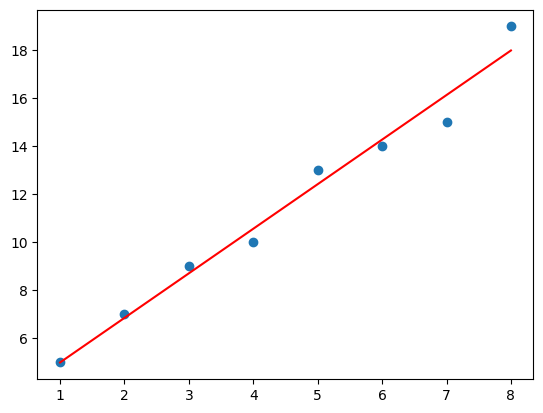

In [12]:
xT = nm.linspace(x_array[0], x_array[len(x_array)-1], 100)
f = g[0, 0] + (g[0, 1] * xT)
fig, ax = plt.subplots()
ax.plot(xT, f, 'r', label='Prediction')
ax.scatter(x_array, y_array, label='Traning Data')
plt.show()

测试数据集1计算线性回归

In [42]:
theta=nm.matrix([0,0])
alpha=0.002
iters=10000
x1=nm.matrix([[1,i] for i in data1['x'].values])
y1=nm.matrix([[i] for i in data1['y'].values])
x1.shape,theta.shape,y1.shape

((97, 2), (1, 2), (97, 1))

In [43]:
g,cost=gradient_descent(x1,y1,theta,alpha,iters)
c=compute_cost(x1,y1,g)
print(g,c)

[[-3.78778781  1.18218457]] 4.478033123471362


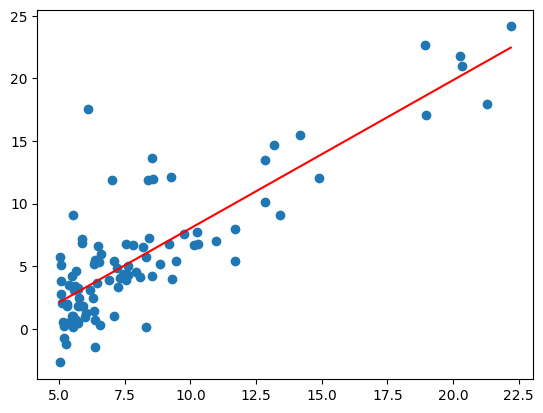

In [44]:
xT = nm.linspace(data1['x'].min(),data1['x'].max(), 100)
f = g[0, 0] + (g[0, 1] * xT)
fig, ax = plt.subplots()
ax.plot(xT, f, 'r', label='Prediction')
ax.scatter(data1['x'], data1['y'], label='Traning Data')
plt.show()

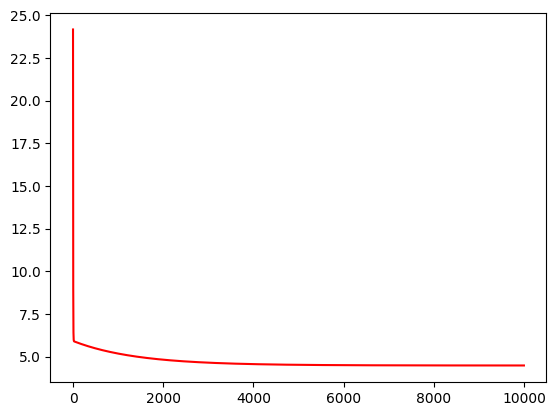

In [45]:
fig, ax = plt.subplots()
ax.plot(nm.arange(iters), cost, 'r')
plt.show()